TP 8 : Compression optimisée d’image Jpeg
=========

1 - Introduction 
------

L'objectif de ce TP est de trouver la meilleure compression possible pour une image jpeg donnée.

Le TP sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

- Python 3: https://docs.python.org/3/
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/
- Matplotilb: https://matplotlib.org/contents.html

**<span style="color:red"> À part si cela est précisé, vous ne devez pas utiliser directement de boucle (`for`,`while`) ou de branchement conditionnel (`if`) durant ce TP.</span>.**

In [1]:
import numpy as np
import scipy as sc
import scipy.misc
import scipy.ndimage
import scipy.optimize
import matplotlib.pyplot as plt
from PIL import Image
import io
%matplotlib inline

2 - Lecture et écriture d’image jpeg
----

Le code suivant permet de lire une image avec la librairie `PIL`.

In [2]:
im = Image.open("lena.jpg")

L'image précédemment chargée n'est pas au format numpy. Vous pouvez récupérer un tableau numpy avec le code suivant:

In [3]:
im_ref = np.asarray(im, dtype=np.uint8)

Affichez cette image avec `matplotlib`. Vous pouvez faire cela avec le tableau `im_ref` ou directement avec l'image `im`.

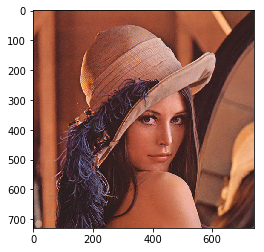

Vous pouvez sauvegarder une image avec différent niveau de compression. Par exemple pour un niveau de qualité de 95\%, vous pouvez écrire le code ci-dessous. Plus la qualité est petite, plus l'image est dégradée, mais en contrepartie moins elle prendra de place sur le disque.

In [5]:
im.save('lena2.jpg','JPEG', quality=95, optimize=True, progressive=True)

Sauvegarder l'image avec une qualité de 5. Regardez l'image qui a été sauvegardée. Que pouvez-vous dire de sa qualité ? Comparez-la avec une image dont la qualité est 95%.

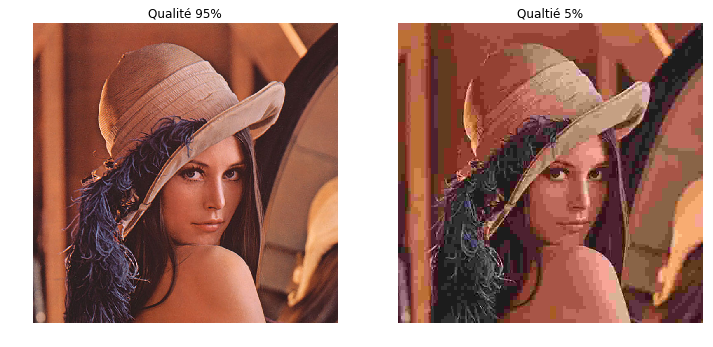

Afin d'éviter des écritures multiples sur le disque et accélérer les lectures et écritures de fichier, nous allons utiliser des fichiers dans une mémoire virtuelle. Le code ci-dessous crée un fichier virtuel en RAM avec l'instruction `fp = io.BytesIO()`. Une image dégradée est enregistrée dans ce fichier puis est ensuite lue et affichée. Les opérations sont faites en RAM ce qui est plus rapide que de passer par une sauvegarde sur le disque. 

Testez le code suivant:

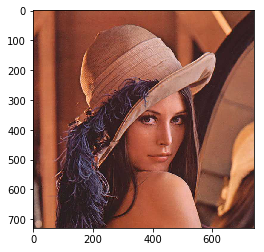

CPU times: user 572 ms, sys: 86.1 ms, total: 659 ms
Wall time: 352 ms


In [7]:
%%time
im = Image.open("lena.jpg")
fp = io.BytesIO()
im.save(fp,'JPEG', quality=50, optimize=True, progressive=True)
im_modif = Image.open(fp)
im_modif_numpy = np.asarray(im_modif)
plt.imshow(im_modif_numpy)
plt.show()

Écrivez une fonction `degradeImage` qui prend une image ouverte avec `PIL` et un facteur de qualité et qui retourne une image ouverte avec `PIL` correspondant à l'image dégradée à la qualité transmise. Vous passerez par un fichier en mémoire virtuelle. Vous ferez en sorte que la valeur de qualité passée à votre fonction soit un nombre réel entre 0 et 1. Attention, la fonction `save` de `PIL` à besoin d'un entier entre 0 et 100 pour fonctionner. 

In [8]:
def degradeIm(im,quality):
    

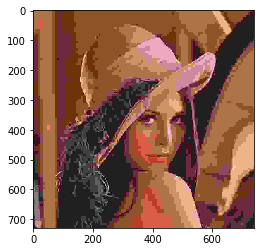

In [9]:
plt.imshow(degradeIm(im,0.01))
plt.show()

3 - Compression optimisée
----- 

Nous voulons compresser l'image la plus possible sans que "visuellement" cela puisse se voir. Nous allons utiliser un critère mesurant la différence de qualité entre l'image de référence et l'image compressée. Plus sa valeur sera grande, plus les deux images seront similaires. 

Le PSNR (Peak Signal to Noise Ratio) est une mesure de la distorsion entre une image et sa version compressée. Il correspond à la formule suivant: 
	$$PSNR(im_1,im_2) = 10 \log_{10}\left( \dfrac{255^2}{d} \right) \text{ avec }d=\dfrac{1}{3 \times \text{nbr de pixel}}\sum_{i,j,k} (im_1[i,j,k]-im_2[i,j,k])^2.$$ 
	Coder une fonction `psnr` qui prend en argument deux images aux formats numpy et qui retourne le psnr entre ces deux images. 
    
Remarque $3 \times \text{nbr de pixel}$ est le nombre d'éléments dans les matrices $im_1$ et $im_2$. Par conséquence $d$ peut être calculé facilement à l'aide d'une fonction d'agrégation bien choisie. 

Testez la fonction `psnr`  en comparant l'image de référence avec:
* elle-même,
* une image jpeg avec une qualité de 50,
* une image jpeg avec une qualité de 5.

PSNR entre im et elle même: inf
PSNR entre im et im50 35.07912944051874
PSNR entre im et im5 29.46526541200126


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


A l'aide d'une boucle for, calculez tous les PSNR entre l'image de référence et des compressions avec des valeurs de qualités allant de 1 à 100. Vous stockerez ces valeurs dans un tableau que vous visualisez ensuite avec la fonction `plot` de `matplotlib`.

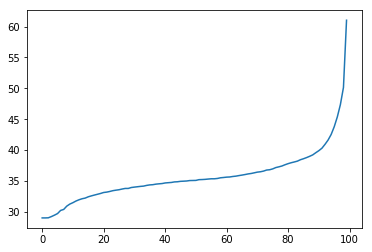

CPU times: user 9.72 s, sys: 153 ms, total: 9.87 s
Wall time: 9.69 s


Nous souhaitons réduire la taille de l'image toute en vérifiant que la valeur du PSNR soit la plus proche possible d'une valeur cible correspondante à une dégradation non perceptible. On pourra prendre par exemple une valeur de PSNR de référence de 35. Créez une fonction `loss` prenant une image de référence ouverte avec `PIL`, une valeur de qualité et un PSNR de référence. Cette fonction retourne la valeur absolue de la différence entre le PSNR de référence et le PSNR entre l'image de référence et l'image compressée avec le facteur de qualité passé en argument. On considérera que le facteur de qualité est un nombre entre 0 et 1 et on réutilisera les fonctions déjà définies dans les questions précédentes.

In [13]:
psnr_ref = 35

In [14]:
def loss(quality,im,psnr_ref=35.):
    

Affichez la fonction de coût de la question précédente pour 100 valeurs de qualité comprises entre 0.01 et 1 et un psnr de référence de 35 . A votre avis quelle valeur de qualité permet d'être le plus proche de notre PSNR cible (35) ? Vous aurez besoin d'une boucle `for` pour cette question. 

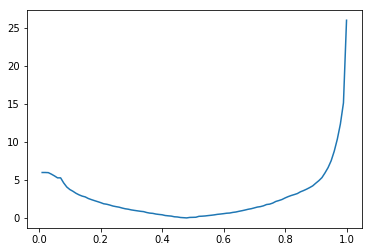

CPU times: user 9.51 s, sys: 155 ms, total: 9.67 s
Wall time: 9.39 s


In [15]:
%%time


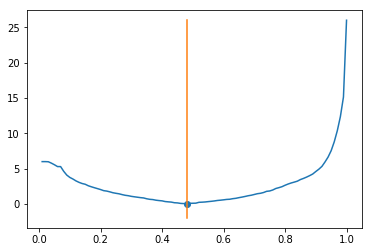

A l'aide d'une boucle `for`, d'un `if` et des fonctions précédentes écrivez un code permettant de trouver le minimum de la fonction coût précédente. Vous implémenterez une version naïve consistant à parcourir tous les exemples possibles entre 0.01 et 1 (compris) avec un pas de 0.01 et testant si la valeur de la fonction de coût est ou non minimale. Vous mesurez le temps d'exécution de cette solution.

In [20]:
%%time


Valeur de compression: 0.48000000000000004  écart avec la cible PSNR: 0.0034562732479912484
CPU times: user 10.3 s, sys: 244 ms, total: 10.5 s
Wall time: 10.6 s


Nous allons maintenant mettre en place une solution plus rapide en utilisant les techniques vues en cours. Nous allons pour cela utiliser une méthode du nombre d'or. 

Complétez le code suivant en remplaçant les "?" : 

In [18]:
%%time
info = sc.optimize.minimize_scalar(?,method=?,bracket=(0.01,0.5,1.0),options={'xtol': 1e-2})

w = info.x 
print(int(100*w),w,loss(w,im,psnr_ref))
print(info)


48 0.4831234917947347 0.0034562732479912484
     fun: 0.0034562732479912484
    nfev: 16
     nit: 11
 success: True
       x: 0.4831234917947347
CPU times: user 1.59 s, sys: 18.6 ms, total: 1.6 s
Wall time: 1.6 s


Comparez les temps d'exécution des deux méthodes. Combien d'évaluations de la fonction de coût ont été nécessaires pour trouver la solution avec la méthode du nombre d'or ? Les solutions trouvées sont-elles les mêmes ? 

Sauvegardez l'image compressée finale dans un fichier et comparez sa taille avec l'image d'origine. La méthode a-t-elle permis de réduire la taille du fichier ? Y a-t-il une différence visuelle entre les deux images ?

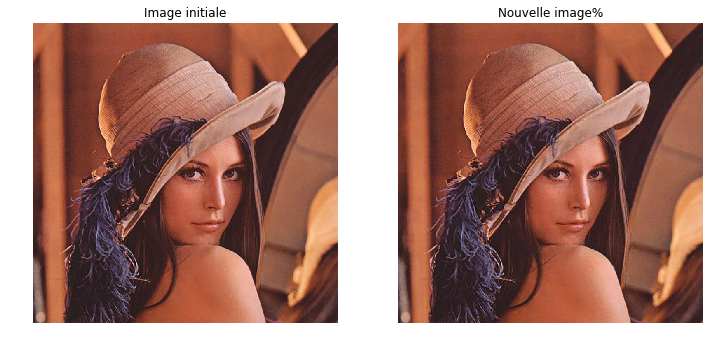